In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 100  # You can adjust this based on model performance

# New Section

In [ ]:
# Define paths to your training and testing data directories
train_data_dir = '/content/drive/MyDrive/datafinal/train'
test_data_dir = '/content/drive/MyDrive/datafinal/test'

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 4220 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 951 images belonging to 2 classes.


In [ ]:
# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout after the second convolutional layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Define early stopping callback

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the trained model
model.save('face_liveness_detection_cnn_model.h5')

Epoch 1/100
131/131 [==============================] - 761s 6s/step - loss: 0.4016 - accuracy: 0.8262 - val_loss: 0.2448 - val_accuracy: 0.9084
Epoch 2/100
131/131 [==============================] - 70s 534ms/step - loss: 0.1865 - accuracy: 0.9305 - val_loss: 0.2707 - val_accuracy: 0.8599
Epoch 3/100
131/131 [==============================] - 70s 534ms/step - loss: 0.1339 - accuracy: 0.9503 - val_loss: 0.0822 - val_accuracy: 0.9838
Epoch 4/100
131/131 [==============================] - 70s 536ms/step - loss: 0.0887 - accuracy: 0.9692 - val_loss: 0.0253 - val_accuracy: 0.9914
Epoch 5/100
131/131 [==============================] - 70s 531ms/step - loss: 0.0462 - accuracy: 0.9876 - val_loss: 0.0172 - val_accuracy: 0.9978
Epoch 6/100
131/131 [==============================] - 71s 539ms/step - loss: 0.0517 - accuracy: 0.9828 - val_loss: 0.0155 - val_accuracy: 0.9989
Epoch 7/100
131/131 [==============================] - 70s 533ms/step - loss: 0.0358 - accuracy: 0.9907 - val_loss: 0.0089 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_json = model.to_json()
with open("face_liveness_detection_model_cnk.json", "w") as json_file:
    json_file.write(model_json)

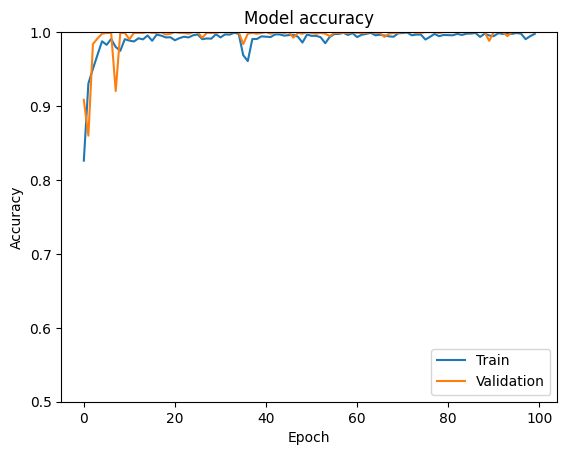

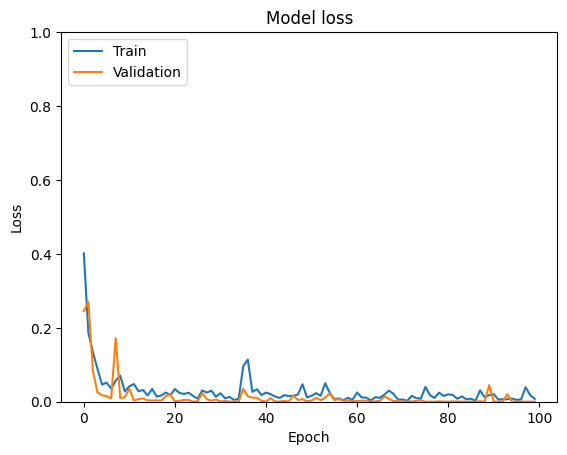

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0.5, 1)
    plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))  # Set y-axis step value
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0.0, 1)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming you have 'history' object from model training
plot_training_history(history)

Found 951 images belonging to 2 classes.
30/30 [==============================] - 183s 6s/step


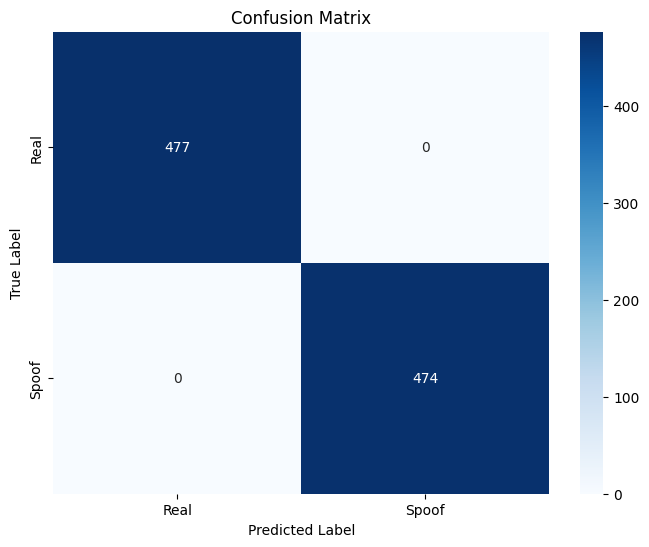

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

# Load the saved model
model = load_model('/content/drive/MyDrive/face_liveness_detection_cnk.h5')

# Directory containing test data
test_data_dir = '/content/drive/MyDrive/datafinal/test'

# Data preprocessing for the test data
datagen = ImageDataGenerator(rescale=1./255)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important to keep the order of data
)

# True classes
y_true = test_generator.classes

# Predicted classes
y_pred = model.predict(test_generator) > 0.5

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
labels = ['Real', 'Spoof']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
precision = true_positives / (true_positives + false_positives)
print(f'Precision: {precision:.2f}')

# Calculate recall
false_negatives = conf_matrix[1, 0]
recall = true_positives / (true_positives + false_negatives)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1-score: {f1_score:.2f}')
